# Mustererkennung/Machine Learning - Assignment 3 Solution

##### Questions to julian.stastny@fu-berlin.de

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from numpy.linalg import pinv
from random import sample

In [2]:
data = np.array(pd.read_csv('Data/2d-em.csv', header=None))

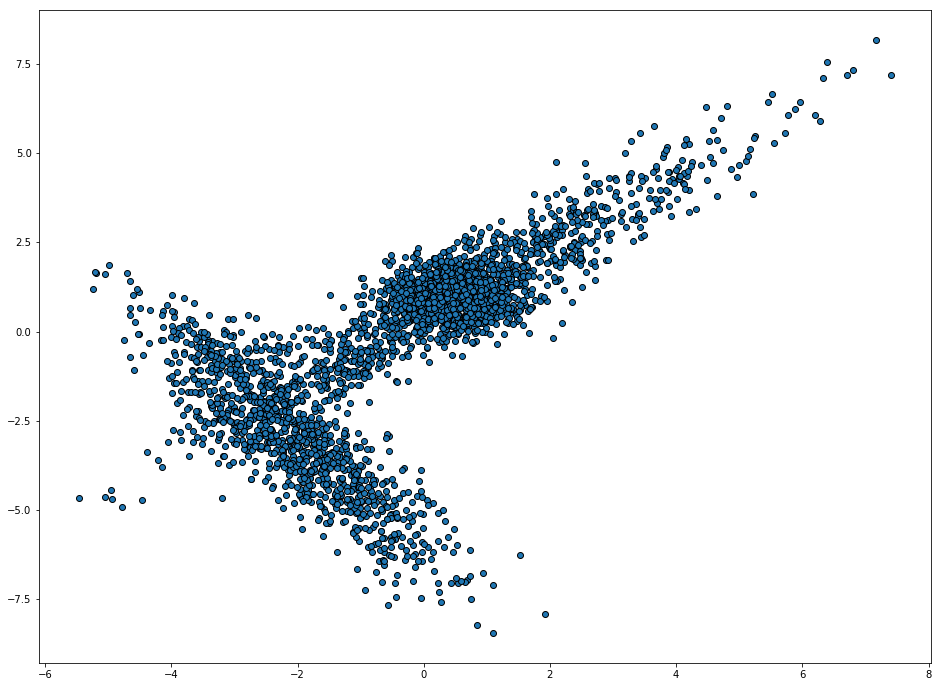

In [3]:
x_values = data[:,0]
y_values = data[:,1]
fig = plt.figure(figsize=(16, 12))
plt.scatter(x_values, y_values, edgecolors='black')

In [4]:
class Clustering:
       
    def fit(self, X, k, num_k_means_iterations=0, num_em_iterations=0):
        self.X = X
        self.num_dims = self.X.shape[1]
        self.k = k
        self.initialize_parameters()
        self.dist = 'euclidean'
        for i in range(num_k_means_iterations):
            self.e_step()
            self.m_step()
        self.dist = 'mahalanobis'
        for i in range(num_em_iterations):
            self.e_step()
            self.m_step()
        return self.assignments, self.mues, self.covs
        
    def initialize_parameters(self):
        self.mues = self.X[np.random.randint(0, high=len(self.X), size=self.k)]
        self.covs = [np.identity(self.num_dims) for _ in range(self.k)]
    
    def e_step(self):
        if self.dist == 'mahalanobis':
            covs_inv = np.array([pinv(cov) for cov in self.covs])
            distances = np.array([cdist(self.X, np.expand_dims(self.mues[i], axis=0),
                                        self.dist, VI=covs_inv[i]) for i in range(self.k)]).squeeze().T
        else:
            distances = cdist(self.X, self.mues, self.dist)
        self.assignments = np.argmin(distances, axis=1)
    
    def m_step(self):
        for k in range(self.k):
            cluster = self.X[self.assignments==k]
            
            if len(cluster) == 0:
                continue
            
            self.mues[k] = np.mean(cluster, axis=0)
            
            if self.dist == 'mahalanobis':
                self.covs[k] = np.cov(cluster-self.mues[k], rowvar=False)

In [5]:
def show_2d_clusters(data):
    model = Clustering()
    for k in range(2, 5):
        assignments, mues, covs = model.fit(data, k=k, num_k_means_iterations=5, num_em_iterations=5)
        fig_result = plt.figure(figsize=(16, 12))
        for i in range(max(assignments)+1):
            cluster = data[assignments==i]
            mue = mues[i]
            plt.scatter(cluster[:,0], cluster[:,1], edgecolors='black')
            plt.scatter([mue[0]], mue[1], color='black', edgecolors='white', s=100)
        plt.show()

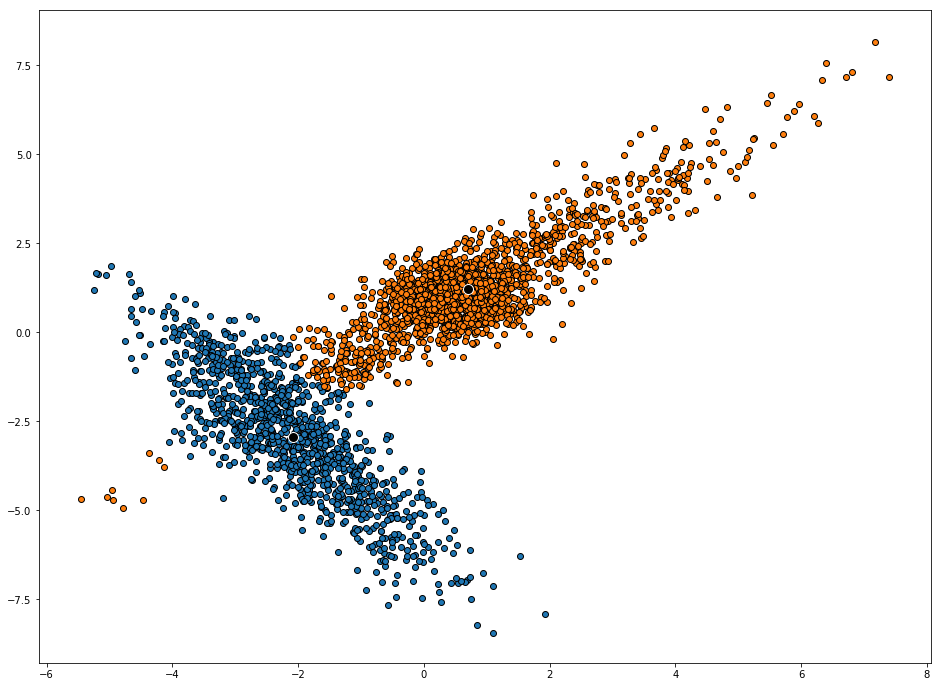

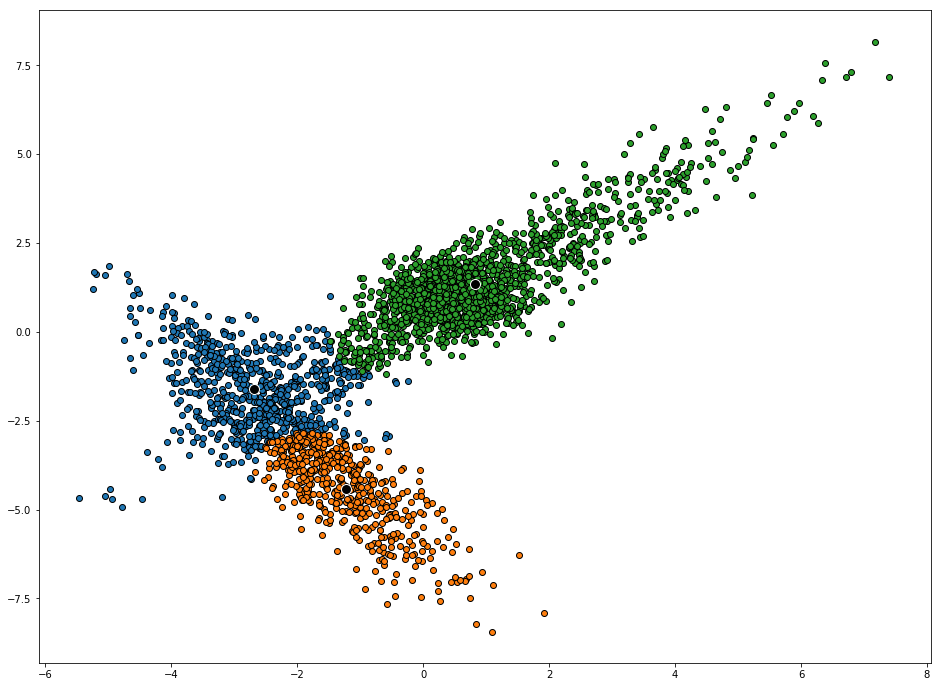

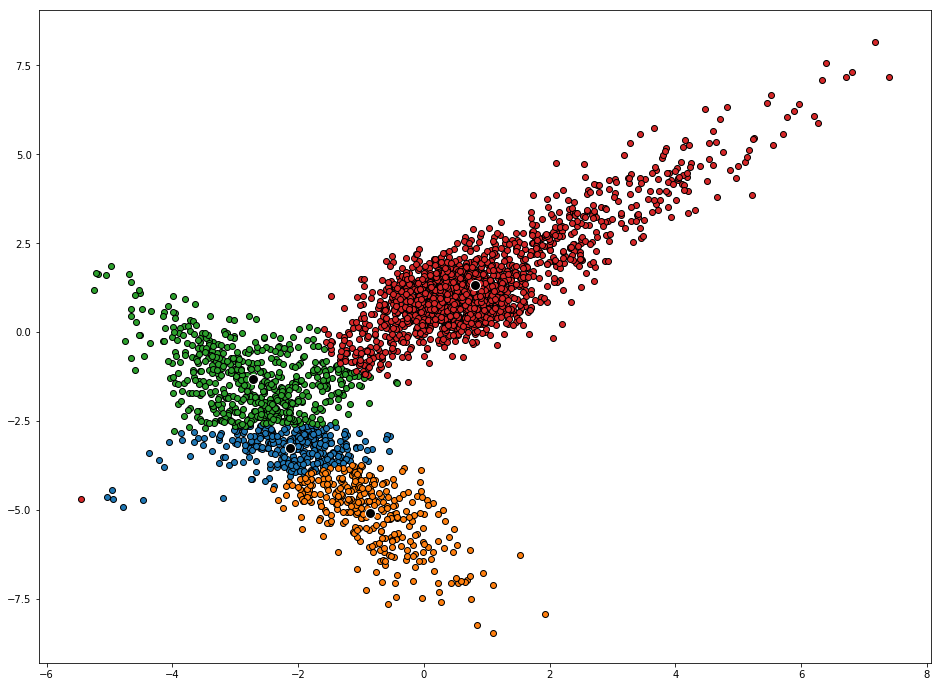

In [6]:
show_2d_clusters(data)

### Image Compression with EM

In [7]:
from imageio import imread

In [8]:
path = 'Data/munch.jpg'

In [9]:
class ImageCompression:
    
    def __init__(self):
        self.model = Clustering()
    
    def compress(self, dataset, num_colors, num_k_means_iterations=0, num_em_iterations=5):
        assignments, mues, _ = self.model.fit(
            dataset, num_colors, num_k_means_iterations=num_k_means_iterations, 
            num_em_iterations=num_em_iterations)
        for i in range(num_colors):
            dataset[assignments==i] = mues[i]
        return dataset
    
    def image_preprocessing(self, path):
        image = imread(path)
        original_shape = image.shape
        dataset = image.reshape(-1, 3)
        return image, original_shape, dataset
    
    def show_image(self, dataset, original_shape):
        image = dataset.reshape(original_shape)
        plt.imshow(image)

In [10]:
def compress_image(path):
    compressor = ImageCompression()
    fig = plt.figure(figsize=(16,12))
    for i in range(1, 6+1):
        image, original_shape, dataset = compressor.image_preprocessing(path)
        ax = plt.subplot(2, 3, i)
        compressed_data = compressor.compress(dataset, 2**i)
        compressor.show_image(compressed_data, original_shape)
        plt.axis('off')
        print('Compressed image to %d colors' %2**i)

Compressed image to 2 colors
Compressed image to 4 colors
Compressed image to 8 colors
Compressed image to 16 colors
Compressed image to 32 colors
Compressed image to 64 colors


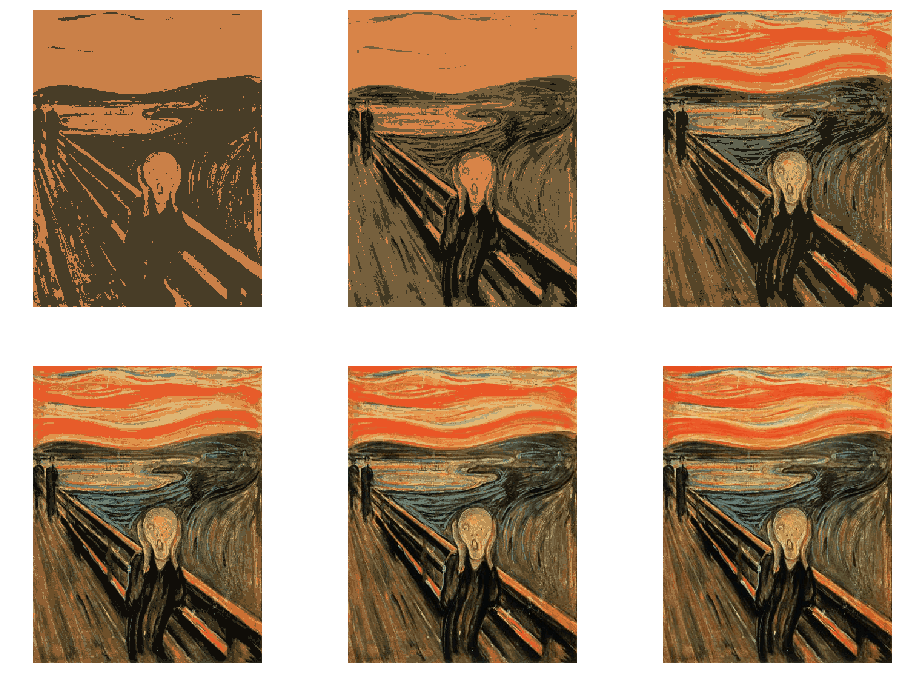

In [11]:
compress_image(path)